# 7.3 RDD API应用

## 7.3.1 RDD的创建

### Int类型RDD

In [1]:
int_data = [1,2,3,4,5,5]

In [2]:
int_rdd = sc.parallelize(int_data)

In [3]:
int_rdd.collect()

[1, 2, 3, 4, 5, 5]

### String类型RDD

In [4]:
str_data = ["one", "two", "three", "four", "five", "five"]
str_rdd = sc.parallelize(str_data)

In [5]:
str_rdd.collect()

['one', 'two', 'three', 'four', 'five', 'five']

### Key-Value类型

In [6]:
kv_data = [('a', 1), ('b', 6), ('a', 3), ('c', 3)]
kv_rdd = sc.parallelize(kv_data)

In [7]:
kv_rdd.collect()

[('a', 1), ('b', 6), ('a', 3), ('c', 3)]

### 混合类型RDD

In [8]:
mutil_data = [1 , "two", 3.3]

In [9]:
mutil_rdd = sc.parallelize(mutil_data)
mutil_rdd.collect()

[1, 'two', 3.3]

### RDD 基本信息
这里展示的RDD基本信息包括系统信息和统计信息，其中统计信息包含了基本的统计计算值，如最大值、最小值、平均数、描述统计等。

In [10]:
int_rdd.isEmpty()

False

In [11]:
int_rdd.getNumPartitions()

2

In [12]:
int_rdd.stats()

(count: 6, mean: 3.3333333333333335, stdev: 1.4907119849998596, max: 5.0, min: 1.0)

In [13]:
int_rdd.min()

1

In [14]:
int_rdd.max()

5

In [15]:
int_rdd.stdev()

1.4907119849998596

In [16]:
int_rdd.count()

6

In [17]:
int_rdd.sum()

20

In [18]:
int_rdd.mean()

3.3333333333333335

## 7.3.2 RDD Transform基本运算

### map( )

In [19]:
rdd_out = int_rdd.map(lambda  x : x * 2)
rdd_out.collect()

[2, 4, 6, 8, 10, 10]

In [20]:
def doubleFunc(x):
    return x * 2

rdd_out = int_rdd.map(doubleFunc)
rdd_out.collect()

[2, 4, 6, 8, 10, 10]

In [21]:
rdd_out = str_rdd.map(lambda x: "English num is :"+x)
rdd_out.collect()

['English num is :one',
 'English num is :two',
 'English num is :three',
 'English num is :four',
 'English num is :five',
 'English num is :five']

### filter( )

In [22]:
rdd_out = int_rdd.filter(lambda x : x >= 2)
rdd_out.collect()

[2, 3, 4, 5, 5]

In [23]:
rdd_out = int_rdd.filter(lambda x : x >=1 and x <=4)
rdd_out.collect()

[1, 2, 3, 4]

In [24]:
rdd_out = int_rdd.filter(lambda x : x >4 or x<=2 )
rdd_out.collect()

[1, 2, 5, 5]

In [25]:
rdd_out = str_rdd.filter(lambda x : x.endswith("e"))
rdd_out.collect()

['one', 'three', 'five', 'five']

### distinct( )

In [26]:
rdd_out = int_rdd.distinct()
rdd_out.collect()

[2, 4, 1, 3, 5]

In [27]:
rdd_out = str_rdd.distinct()
rdd_out.collect()

['two', 'three', 'four', 'one', 'five']

### groupBy( )

In [10]:
grdd = int_rdd.groupBy(lambda  x: "odd" if (x % 2 != 0) else "even")
grdd_out = grdd.collect()

In [11]:
grdd_out[0][0], sorted(grdd_out[0][1])

('even', [2, 4])

In [12]:
grdd_out[1][0], sorted(grdd_out[1][1])

('odd', [1, 3, 5, 5])

**其中 grdd 不能直接打印会报错**

In [15]:
grdd_out[0][1]

### flatMap( )

In [32]:
int_rdd.flatMap(lambda x : range(1,x)).collect()

[1, 1, 2, 1, 2, 3, 1, 2, 3, 4, 1, 2, 3, 4]

### repartition( )

In [33]:
int_rdd.repartition(3).getNumPartitions()

3

In [23]:
rp1, rp2 = int_rdd.randomSplit([0.3, 0.7])
print("rp1:",rp1.collect(), "rp2:",rp2.collect())

rp1: [3, 4] rp2: [1, 2, 5, 5]


## 7.3.3 RDD Action基本运算

### collect( )

In [34]:
int_rdd.collect()

[1, 2, 3, 4, 5, 5]

### reduce( )

In [35]:
rdd_out = int_rdd.reduce(lambda x,y : x+y)

In [36]:
rdd_out

20

### count( )

In [37]:
int_rdd.count()

6

### first( )

In [24]:
str_rdd.first()

'one'

### take( )

In [39]:
str_rdd.take(2)

['one', 'two']

### top( )

In [40]:
int_rdd.top(3)

[5, 5, 4]

### takeOrdered( )

In [41]:
int_rdd.takeOrdered(3)

[1, 2, 3]

In [42]:
int_rdd.takeOrdered(3,key=lambda x: -x)

[5, 5, 4]

### takeSample( )

In [43]:
int_rdd.takeSample(True, 2, 3)

[2, 5]

### foreach( )

In [44]:
def f(x): 
    print(x)
int_rdd.foreach(f)

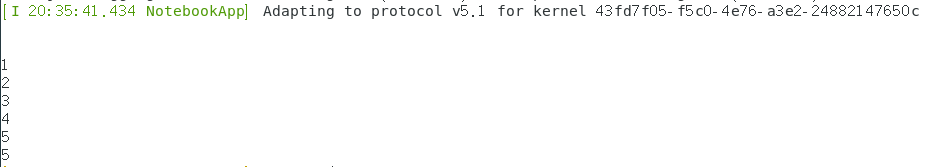

### saveAsTextFile( )

In [46]:
!pwd

/root/pyspark-book


In [47]:
int_rdd.saveAsTextFile('file:///root/pyspark-book/rdd.txt')

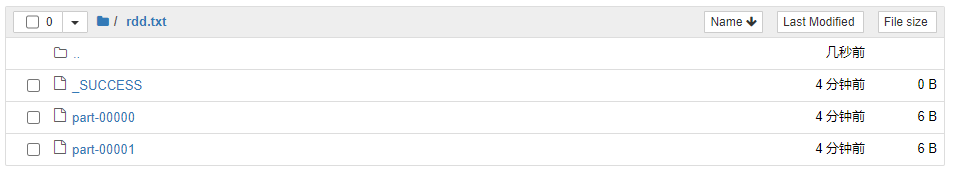

### union( )

In [48]:
int_rdd1 = sc.parallelize([3, 1, 2, 5, 5])
int_rdd2 = sc.parallelize([5, 6])
int_rdd3 = sc.parallelize([2, 7])

In [49]:
int_rdd1.collect()

[3, 1, 2, 5, 5]

In [50]:
int_rdd2.collect()

[5, 6]

In [51]:
int_rdd3.collect()

[2, 7]

In [52]:
int_rdd1.union(int_rdd2).union(int_rdd3).collect()

[3, 1, 2, 5, 5, 5, 6, 2, 7]

### intersection( )

In [53]:
int_rdd1.intersection(int_rdd2).collect()

[5]

### subtract( )

In [54]:
int_rdd1.subtract(int_rdd2).collect()

[1, 2, 3]

### cartesian( )

In [55]:
int_rdd1.cartesian(int_rdd2).collect()

[(3, 5),
 (1, 5),
 (3, 6),
 (1, 6),
 (2, 5),
 (5, 5),
 (5, 5),
 (2, 6),
 (5, 6),
 (5, 6)]

## 7.3.4 RDD Key-Value Transform基本运算

### keys( )

In [56]:
kv_rdd.keys().collect()

['a', 'b', 'a', 'c']

### values( )

In [57]:
kv_rdd.values().collect()

[1, 6, 3, 3]

### filter( )

In [58]:
kv_rdd.filter(lambda kv: kv[0] != 'a').collect()

[('b', 6), ('c', 3)]

In [59]:
kv_rdd.filter(lambda kv: kv[1] > 2).collect()

[('b', 6), ('a', 3), ('c', 3)]

### mapValues( )

In [60]:
def f(x):
    return 2 * x
kv_rdd.mapValues(f).collect()

[('a', 2), ('b', 12), ('a', 6), ('c', 6)]

### sortByKey( )

In [61]:
kv_rdd.sortByKey().collect()

[('a', 1), ('a', 3), ('b', 6), ('c', 3)]

In [62]:
kv_rdd.sortByKey(ascending=False).collect()

[('c', 3), ('b', 6), ('a', 1), ('a', 3)]

### sortBy( )

In [63]:
kv_rdd.sortBy(lambda x: x[1], ascending=False).collect()

[('b', 6), ('a', 3), ('c', 3), ('a', 1)]

### reduceByKey( )

In [64]:
kv_rdd.reduceByKey(lambda x ,y: x+y).collect()

[('b', 6), ('c', 3), ('a', 4)]

### flatMapValues( )

In [65]:
kv_rdd2 = sc.parallelize([("a", ["x", "y", "z"]), ("b", ["p", "r"])])
kv_rdd2.flatMapValues(lambda x : x).collect()

[('a', 'x'), ('a', 'y'), ('a', 'z'), ('b', 'p'), ('b', 'r')]

### join

In [66]:
kv_rdd3 = sc.parallelize([('a', 1), ('c', 6)])
kv_rdd3.collect()

[('a', 1), ('c', 6)]

In [67]:
kv_rdd.join(kv_rdd3).collect()

[('c', (3, 6)), ('a', (1, 1)), ('a', (3, 1))]

### leftOuterJoin( )

In [68]:
kv_rdd.leftOuterJoin(kv_rdd3).collect()

[('b', (6, None)), ('c', (3, 6)), ('a', (1, 1)), ('a', (3, 1))]

### rightOuterJoin( )

In [69]:
kv_rdd.rightOuterJoin(kv_rdd3).collect()

[('c', (3, 6)), ('a', (1, 1)), ('a', (3, 1))]

### intersection( )

In [70]:
kv_rdd.intersection(kv_rdd3).collect()

[('a', 1)]

### union( )

In [71]:
kv_rdd.union(kv_rdd3).collect()

[('a', 1), ('b', 6), ('a', 3), ('c', 3), ('a', 1), ('c', 6)]

### subtract( )

In [72]:
kv_rdd.subtract(kv_rdd3).collect()

[('b', 6), ('a', 3), ('c', 3)]

### subtractByKey( )

In [73]:
kv_rdd.subtractByKey(kv_rdd3).collect()

[('b', 6)]

### cartesian( )

In [74]:
kv_rdd.cartesian(kv_rdd3).collect()

[(('a', 1), ('a', 1)),
 (('b', 6), ('a', 1)),
 (('a', 1), ('c', 6)),
 (('b', 6), ('c', 6)),
 (('a', 3), ('a', 1)),
 (('c', 3), ('a', 1)),
 (('a', 3), ('c', 6)),
 (('c', 3), ('c', 6))]

## 7.3.4 RDD Key-Value Action基本运算

### reduceByKey( )

In [26]:
kv_rdd.reduceByKey(lambda x,y:x+y).collect()

[('b', 6), ('c', 3), ('a', 4)]

### first( )

In [76]:
kv_rdd.first()

('a', 1)

### take( )

In [77]:
kv_rdd.take(2)

[('a', 1), ('b', 6)]

### countByKey( )

In [78]:
kv_rdd.countByKey().items()

dict_items([('a', 2), ('b', 1), ('c', 1)])

### countByValue( )

In [79]:
kv_rdd.countByValue().items()

dict_items([(('a', 1), 1), (('b', 6), 1), (('a', 3), 1), (('c', 3), 1)])

### collectAsMap( )

In [80]:
kv_rdd.collectAsMap()

{'a': 3, 'b': 6, 'c': 3}

### lookup( )

In [81]:
kv_rdd.lookup('a')

[1, 3]

## 7.3.5 共享变量

### Broadcast 广播变量

In [82]:
animal_id = sc.parallelize([3,1,2,4])
print("动物id：", animal_id.collect())

动物id： [3, 1, 2, 4]


In [83]:
kv_animal = sc.parallelize([(1, "dog"), (2, "cat"), (3, "pig"), (4, "duck")])
animal_map = kv_animal.collectAsMap()
print("动物：", animal_map)

动物： {1: 'dog', 2: 'cat', 3: 'pig', 4: 'duck'}


In [84]:
bst_map = sc.broadcast(animal_map)
print("广播变量", bst_map)

广播变量 <pyspark.broadcast.Broadcast object at 0x7f57a0a15a20>


In [85]:
# 使用 Broadcast 进行转换
animal_name = animal_id.map(lambda x : bst_map.value[x]).collect()
print("使用 Broadcast 进行转换, 动物名：", animal_name)

使用 Broadcast 进行转换, 动物名： ['pig', 'dog', 'cat', 'duck']


###	accumulator累加器

官网

In [86]:
accum = sc.accumulator(0)
acc_rdd = sc.parallelize([1,2,3,4])

In [87]:
def g(x):
    accum.add(x)

In [88]:
acc_rdd.foreach(g) 
final = accum.value 
print("final=" , final)

final= 10


## 7.3.6 RDD Persistence持久化

In [89]:
int_rdd.persist()
int_rdd.is_cached

True

In [90]:
int_rdd.unpersist()
int_rdd.is_cached

False

In [91]:
from pyspark import StorageLevel
int_rdd.persist(StorageLevel.MEMORY_AND_DISK)
int_rdd.is_cached

True

## 7.3.8 Spark WordCount 代码详解

In [92]:
%ll data/

总用量 22776
-rw-r--r--. 1 root     3560 2月   5 19:59 access_log.txt
drwxr-xr-x. 4 root      186 2月   5 20:03 ai/
-rw-r--r--. 1 root   294214 2月   5 19:59 Beijing_PM25.csv
-rw-r--r--. 1 root  4318308 2月   5 19:59 free-zipcode-database-Primary.csv
drwxr-xr-x. 5 root      157 2月   5 20:12 resources/
drwxr-xr-x. 2 root      176 2月   5 20:05 result_PM2.5/
-rw-r--r--. 1 root       38 2月   5 19:59 test.txt
-rw-r--r--. 1 root   833791 2月   5 19:59 The DaVinci Code.txt
-rw-r--r--. 1 root    33975 2月   5 19:59 user_action.txt
-rw-r--r--. 1 root 17824913 2月   5 19:59 user_visit_action.txt
drwxr-xr-x. 2 root      125 2月   5 19:59 wordcount_output/


In [93]:
#Step1 sc.textFile读取文件 

In [98]:
# HDFS 路径
# hdfs dfs -mkdir /data
# hdfs dfs -put The_DaVinci_Code.txt /data/

In [97]:
word_data = sc.textFile("/data/The_DaVinci_Code.txt")
word_data.take(3)

['TheDaVinciCode - FOR BLYTHE... AGAIN. MORE THAN EVER',
 '',
 'FOR BLYTHE... AGAIN. MORE THAN EVER.']

In [99]:
#Step2 flatMap取出每一个单词

In [100]:
word_rdd = word_data.flatMap(lambda line : line.split(" "))
word_rdd.take(5)

['TheDaVinciCode', '-', 'FOR', 'BLYTHE...', 'AGAIN.']

In [101]:
word_cnt = word_rdd.map(lambda word : (word, 1))
word_cnt.take(5)

[('TheDaVinciCode', 1), ('-', 1), ('FOR', 1), ('BLYTHE...', 1), ('AGAIN.', 1)]

In [102]:
word_count = word_cnt.reduceByKey(lambda x,y : x+y)
word_count.take(5)

[('TheDaVinciCode', 109),
 ('FOR', 4),
 ('BLYTHE...', 2),
 ('AGAIN.', 2),
 ('MORE', 2)]

In [107]:
word_count.saveAsTextFile("/data/wordcount_output")

In [110]:
!hdfs dfs -ls /data/wordcount_output

Found 3 items
-rw-r--r--   2 root supergroup          0 2022-02-05 20:52 /data/wordcount_output/_SUCCESS
-rw-r--r--   2 root supergroup     169265 2022-02-05 20:52 /data/wordcount_output/part-00000
-rw-r--r--   2 root supergroup     167253 2022-02-05 20:52 /data/wordcount_output/part-00001


In [113]:
!hdfs dfs -cat /data/wordcount_output/part-00000

('TheDaVinciCode', 109)
('FOR', 4)
('BLYTHE...', 2)
('AGAIN.', 2)
('MORE', 2)
('THAN', 2)
('EVER', 1)
('', 773)
('EVER.', 1)
('editor,', 2)
('Jason', 1)
('Kaufman,', 1)
('working', 15)
('this', 519)
('project', 2)
('truly', 14)
('book', 24)
('is', 726)
('And', 105)
('Heide', 1)
('Lange-tireless', 1)
('of', 3284)
('The', 1228)
('Da', 92)
('Vinci', 57)
('agent', 58)
('trusted', 9)
('friend.', 4)
('cannot', 30)
('gratitude', 3)
('team', 6)
('at', 747)
('Doubleday,', 1)
('faith,', 3)
('guidance.', 1)
('Thank', 4)
('especially', 8)
('Bill', 2)
('Thomas', 1)
('Rubin,', 1)
('believed', 25)
('in', 1783)
('thanks', 2)
('initial', 6)
('headed', 12)
('Michael', 1)
('Palgon,', 1)
('Janelle', 1)
('Moburg,', 1)
('Adrienne', 1)
('as', 710)
("Doubleday's", 1)
('assistance', 2)
('research', 7)
('book,', 5)
('would', 364)
('like', 233)
('acknowledge', 1)
('Project', 1)
('Gutenberg,', 1)
('Gnostic', 2)
('Society', 1)
('Library,', 1)
('Documentation', 1)
('Louvre,', 8)
('Catholic', 28)
('World', 5)
('News

('water', 9)
('haunting', 2)
('machine,', 2)
('continually', 2)
('believing', 4)
('tiny', 14)
('stepped', 44)
('lift,', 2)
('shut.', 2)
('Two', 10)
('Ten', 7)
('Sauni��re,"', 1)
('move,', 1)
('"you', 6)
('all?', 1)
('Never', 3)
('corresponded?', 1)
('Another', 10)
('"No.', 8)
('Never."', 1)
('cocked', 1)
('Saying', 1)
('nothing,', 3)
('doors.', 4)
('ascended,', 1)
('shiny', 1)
('clip-a', 1)
('silver', 4)
('thirteen', 5)
('vaguely', 8)
('surprising.', 3)
('gemmata-a', 1)
('cross', 12)
('Christian', 29)
('ideogram', 1)
('twelve', 6)
('Somehow', 2)
('broadcast', 5)
('religion', 10)
('Startled,', 2)
('stop,', 3)
('wide-open', 2)
('high', 15)
('stopped', 22)
('gather,', 1)
('hours?"', 1)
('trying', 64)
('Usually', 2)
('flat-white', 1)
('emanate', 1)
('patches', 1)
('scene.', 2)
('Virtually', 1)
('major', 8)
('night-strategically', 1)
('placed,', 1)
('low-level,', 1)
('staff', 3)
('kept', 37)
('overexposure', 1)
('oppressive', 1)
('quality.', 3)
('Long', 3)
('shadows', 14)
('everywhere,', 3)

('join', 5)
('moment?"', 1)
('ill-timed', 1)
('intrusion.', 1)
('night."', 2)
('grunted', 1)
('R��my."', 4)
('matter,', 3)
('guests', 2)
('"Sometimes', 1)
('oppression,', 1)
('au', 2)
('ballroom.', 1)
('Sophie,"', 1)
('impossible."', 1)
("mother's", 1)
('maiden', 1)
('Chauvel?"', 1)
('Plantard', 3)
('Saint-Clair.', 3)
('families', 3)
('hiding,', 1)
('ever.', 1)
('stolen.', 1)
('closer.', 2)
('"You\'ve', 4)
('example.', 1)
('literature,', 1)
('music', 2)
('Bernini,', 1)
('Mozart,', 2)
('Enduring', 1)
('Green', 3)
('Arthur,', 1)
('Beauty', 1)
("Hugo's", 1)
('Hunchback', 1)
('Magic', 1)
('Flute', 1)
('Paintings.', 1)
('Music.', 1)
('cartoons,', 1)
('Walt', 2)
('uniquely', 1)
('gifted', 1)
('notably,', 1)
('avid', 1)
('pranksters.', 1)
('Leonardo,', 1)
('infusing', 1)
('symbologist,', 1)
('avalanche', 1)
('allusion', 4)
("Disney's", 2)
('religion,', 2)
('myth,', 1)
('retold', 1)
('Cinderella,', 1)
('Snow', 2)
('White-all', 1)
('White-a', 1)
('princess', 2)
('apple-was', 1)
('Eden.', 1)
('A